* [인프런 - 단 두 장의 문서로 데이터 분석과 시각화 뽀개기](https://www.inflearn.com/course/%ED%8C%90%EB%8B%A4%EC%8A%A4-Pandas)에서 전 코드에 대한 강좌를 보실 수 있습니다.

## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do


해당 데이터는 지금도 업데이트가 되고 있는 데이터셋입니다. 
최근 데이터로 실습을 하시면 변경된 내용이 많아 당황하실 수 있습니다. <font color="red">6월 30일자 기준 데이터</font>로 우선 실습해 보시고 응용해 보는 걸 권장합니다.

In [1]:
# pandas, numpy 라이브러리 로드하기
import pandas as pd
import numpy as np

In [2]:
# file_name 변수 지정
file_name = f"seoul-covid19-2021-10-07.csv"
file_name

'seoul-covid19-2021-10-07.csv'

In [3]:
# read_csv 로 csv 파일을 불러와 주세요.
df = pd.read_csv(file_name, encoding="utf-8")
df.shape

(106332, 7)

In [4]:
# "연번"을 기준으로 역순으로 정렬합니다.
df = df.sort_values(by="연번", ascending=False)

In [5]:
# head 로 미리보기를 합니다.
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,106332,327968,2021-10-07,은평구,-,마포구 소재 시장 관련,NaN
1,106331,327907,2021-10-07,영등포구,-,감염경로 조사중,NaN
2,106330,327842,2021-10-07,구로구,-,감염경로 조사중,NaN
3,106329,327811,2021-10-07,동대문구,-,감염경로 조사중,NaN
4,106328,327703,2021-10-07,성북구,-,감염경로 조사중,NaN


In [6]:
# tail 로 미리보기를 합니다.
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
106327,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
106328,4,7,2020-01-30,마포구,중국,해외유입,퇴원
106329,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
106330,2,5,2020-01-30,중랑구,중국,해외유입,퇴원
106331,1,2,2020-01-24,강서구,중국,해외유입,퇴원


## 시각화 도구 불러오기

<AxesSubplot:title={'center':'한글 제목'}>

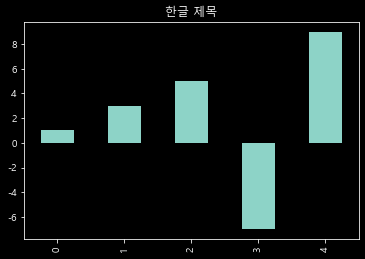

In [7]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt\

# 폰트 설정
# window
plt.rc("font", family="Malgun Gothic")
# mac os
# plt.rc("font", family="AppleGothic")

# 마이너스 부호 깨짐
plt.rc("axes", unicode_minus=False)
plt.style.use("dark_background")

temp = pd.Series([1, 3, 5, -7, 9])
temp.plot.bar(title="한글 제목")

### 시각화 선명하게 설정하기

In [8]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<ipython-input-8-7b29309b675b>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


## 확진일

In [9]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.
df["확진일"].value_counts()

2021-09-24    1222
2021-09-28    1054
2021-09-29     944
2021-09-25     928
2021-09-30     915
              ... 
2020-02-02       1
2020-01-24       1
2020-05-17       1
2020-04-30       1
2020-03-05       1
Name: 확진일, Length: 591, dtype: int64

In [10]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.
df["확진일"].head(1)

0    2021-10-07
Name: 확진일, dtype: object

In [11]:
"2020-06-30"

'2020-06-30'

In [12]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.
df["확진일자"] = pd.to_datetime(df["확진일"])
df[["확진일", "확진일자"]].head()
df["확진일자"].head(1)

0   2021-10-07
Name: 확진일자, dtype: datetime64[ns]

In [14]:
# 월만 추출합니다.
df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자","년", "월"]].tail()

,확진일,확진일자,년,월
106327,2020-01-31,2020-01-31,2020,1
106328,2020-01-30,2020-01-30,2020,1
106329,2020-01-30,2020-01-30,2020,1
106330,2020-01-30,2020-01-30,2020,1
106331,2020-01-24,2020-01-24,2020,1


In [15]:
# 해당 연도의 몇번째 "주"인지 추출합니다.
df["주"] = df["확진일자"].dt.isocalendar().week
df[["확진일", "확진일자", "년", "월", "주"]].head()

,확진일,확진일자,년,월,주
0,2021-10-07,2021-10-07,2021,10,40
1,2021-10-07,2021-10-07,2021,10,40
2,2021-10-07,2021-10-07,2021,10,40
3,2021-10-07,2021-10-07,2021,10,40
4,2021-10-07,2021-10-07,2021,10,40


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

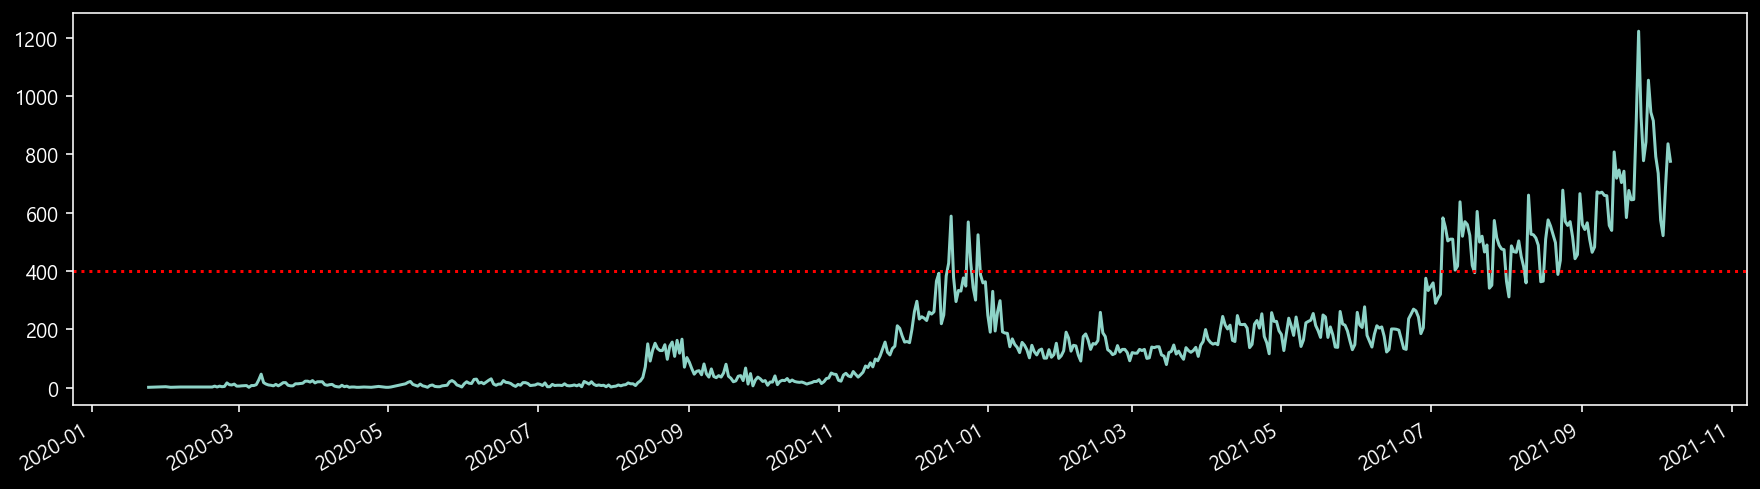

In [16]:
# 확진일자로 선그래프를 그립니다.
df["확진일자"].value_counts().sort_index().plot(figsize=(15, 4))
# 선 긋기
plt.axhline(400, color="red", linestyle=":")

### 선그래프에 값 표시하기

In [17]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
day_count = df["확진일자"].value_counts().sort_index()
day_count

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-10-03    574
2021-10-04    521
2021-10-05    689
2021-10-06    836
2021-10-07    776
Name: 확진일자, Length: 591, dtype: int64

In [18]:
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        print(i, case_count)

25 26
26 46
44 22
45 22
47 24
75 21
92 24
101 28
102 29
107 25
108 30
113 24
146 21
169 23
170 35
171 71
172 150
173 91
174 128
175 152
176 134
177 127
178 127
179 147
180 97
181 142
182 156
183 107
184 162
185 118
186 166
187 70
188 103
189 87
190 65
191 46
192 56
193 58
194 44
195 81
196 47
197 36
198 64
199 38
200 34
201 41
202 36
203 50
204 80
205 39
206 32
208 23
209 39
210 41
211 24
212 67
214 48
216 26
217 36
218 30
219 21
220 24
224 40
226 21
227 25
228 24
229 31
231 26
232 21
240 21
241 21
242 27
245 31
246 33
247 50
248 46
249 45
250 25
251 22
252 43
253 49
254 40
255 37
256 55
257 45
258 36
259 44
260 53
261 74
262 69
263 85
264 71
265 98
266 92
267 109
268 132
269 156
270 121
271 112
272 134
273 142
274 212
275 203
276 177
277 156
278 158
279 154
280 200
281 261
282 296
283 235
284 243
285 238
286 230
287 259
288 252
289 260
290 365
291 392
292 219
293 249
294 383
295 427
296 588
297 378
298 295
299 333
300 331
301 376
302 348
303 568
304 430
305 343
306 300
307 524
308 387

In [19]:
# for i in range(len(day_count)):
#     case_count = day_count.iloc[i]
#     if case_count > 20:
#         g.text(x=i, y=case_count, s=case_count)
# g = day_count.plot(figsize=(10, 4))

### 확진자가 가장 많이 나온 날

In [20]:
day_count

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-10-03    574
2021-10-04    521
2021-10-05    689
2021-10-06    836
2021-10-07    776
Name: 확진일자, Length: 591, dtype: int64

In [21]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.
day_count.describe()

count     591.000000
mean      179.918782
std       208.686668
min         1.000000
25%        17.000000
50%       125.000000
75%       238.000000
max      1222.000000
Name: 확진일자, dtype: float64

In [22]:
# 확진자가 가장 많았던 날을 찾습니다.
day_count[day_count == day_count.max()]

2021-09-24    1222
Name: 확진일자, dtype: int64

In [23]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.
df[df["확진일자"] == "2021-09-24"].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,년,월,주
10384,95948,295958,2021-09-24,타시도,-,기타 확진자 접촉,NaN,2021-09-24,2021,9,38
10385,95947,296625,2021-09-24,노원구,-,감염경로 조사중,NaN,2021-09-24,2021,9,38
10386,95946,298357,2021-09-24,중랑구,-,감염경로 조사중,NaN,2021-09-24,2021,9,38
10387,95945,297727,2021-09-24,종로구,-,기타 확진자 접촉,NaN,2021-09-24,2021,9,38
10388,95944,297650,2021-09-24,마포구,-,감염경로 조사중,NaN,2021-09-24,2021,9,38


### 막대그래프 그리기

<AxesSubplot:>

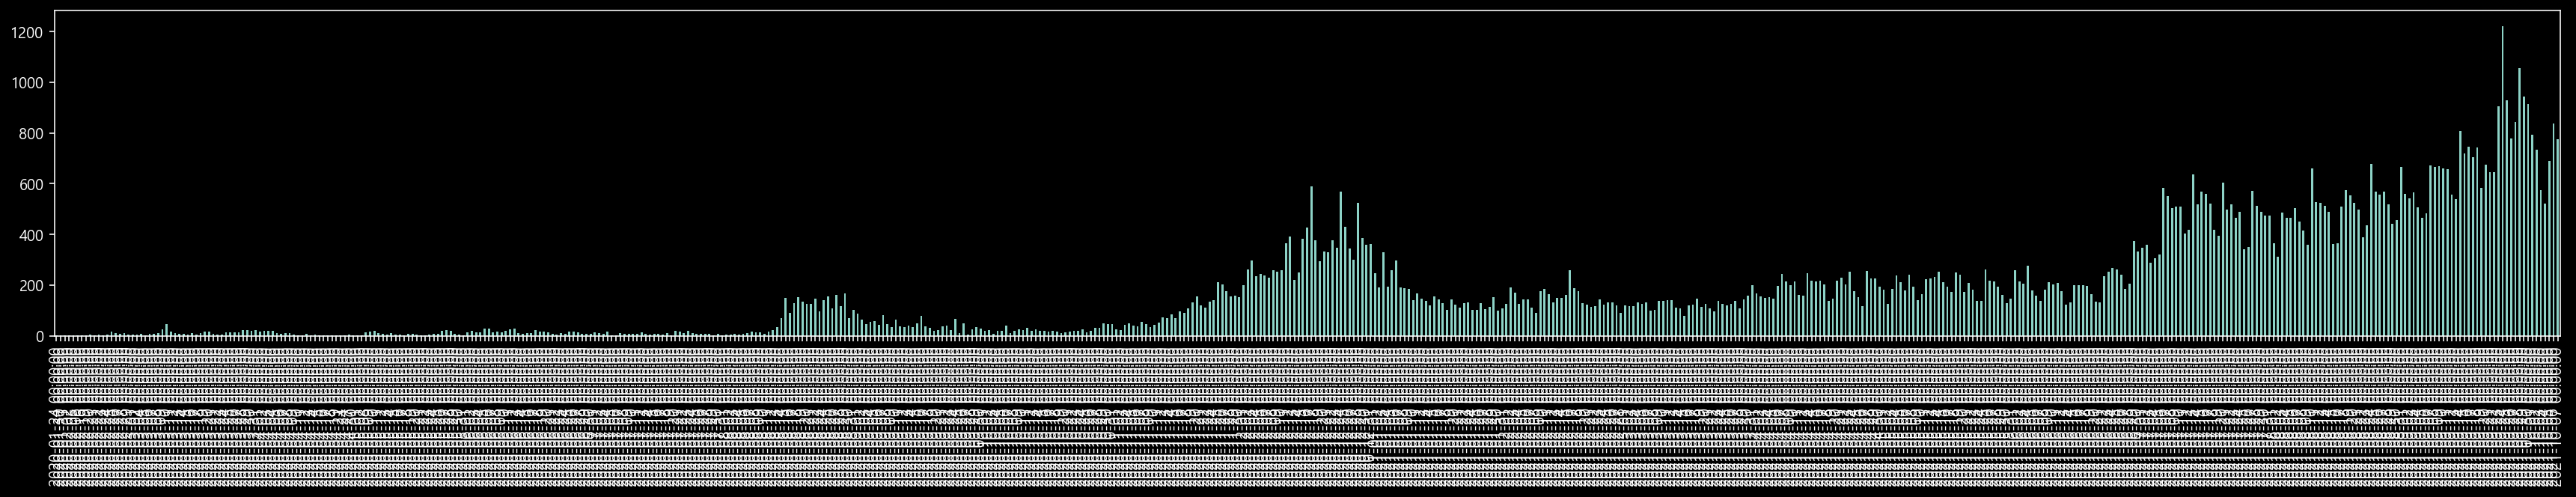

In [24]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.
day_count.plot.bar(figsize=(30, 4))

### 최근 데이터만 슬라이싱으로 나눠 그리기

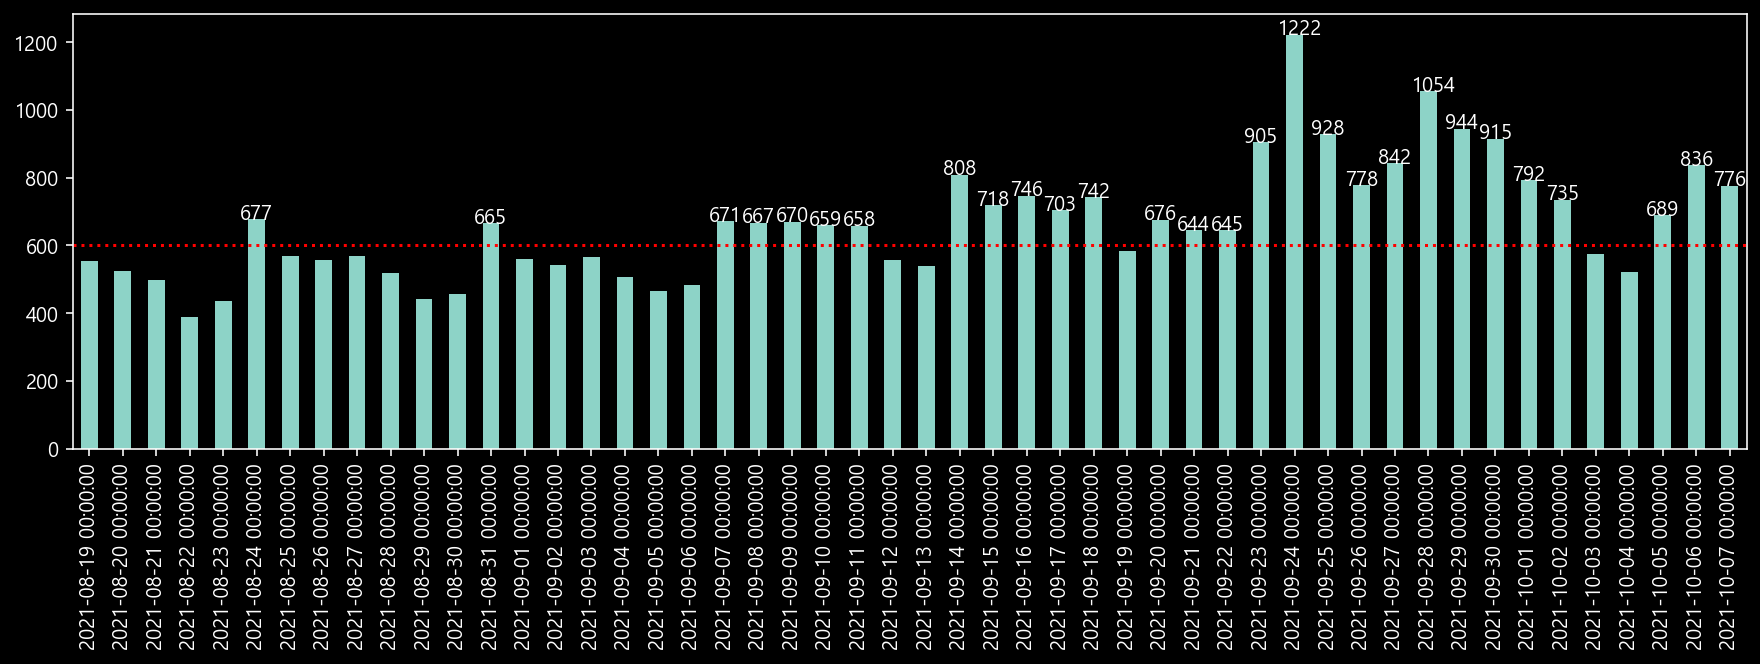

In [25]:
# 슬라이싱을 통해 최근 데이터만 그립니다.
g = day_count[-50:].plot.bar(figsize=(15, 4))
g.axhline(600, linestyle=":", color="red")

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 600:
        g.text(x=i-0.5, y=case_count, s=case_count)

# plt.text(x, y, text)

### 월별 확진자 수 그리기

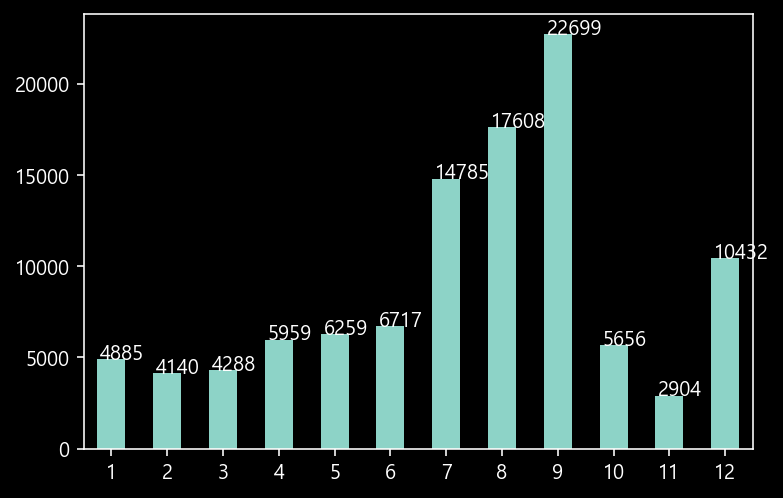

In [26]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.

month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])

### 주단위 확진자수 그리기

<AxesSubplot:>

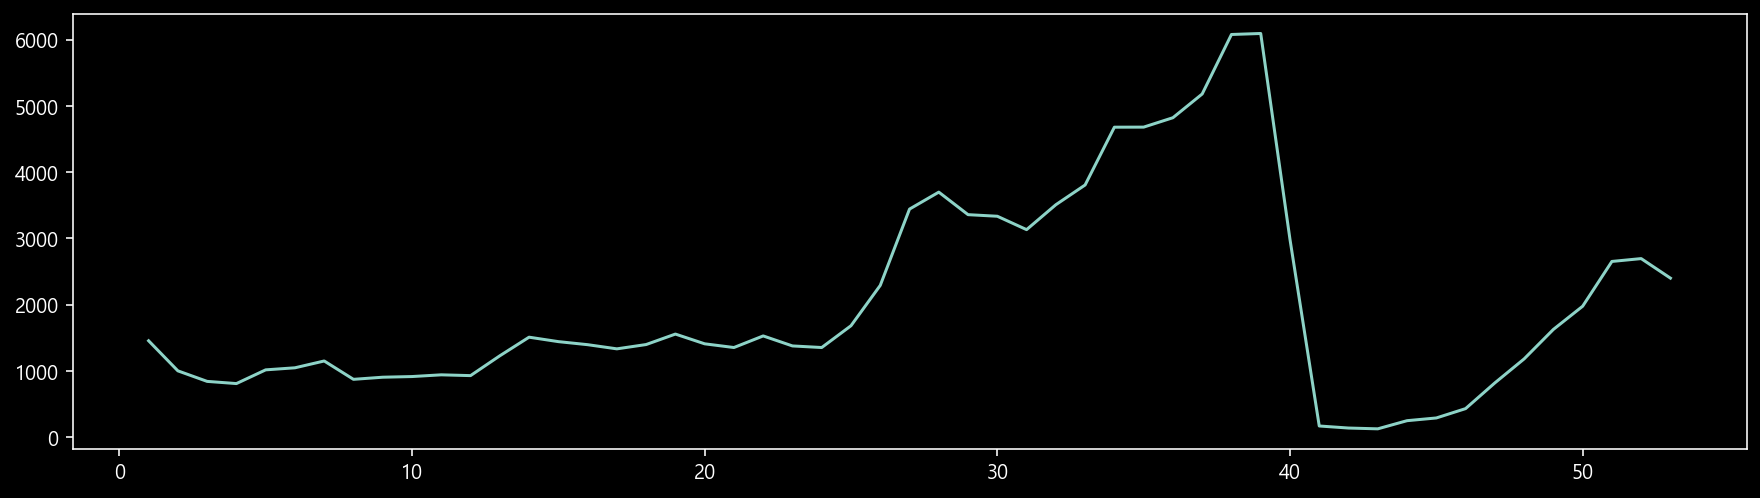

In [27]:
# 주별로 빈도수를 구합니다.

weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot(figsize=(15, 4))

<AxesSubplot:>

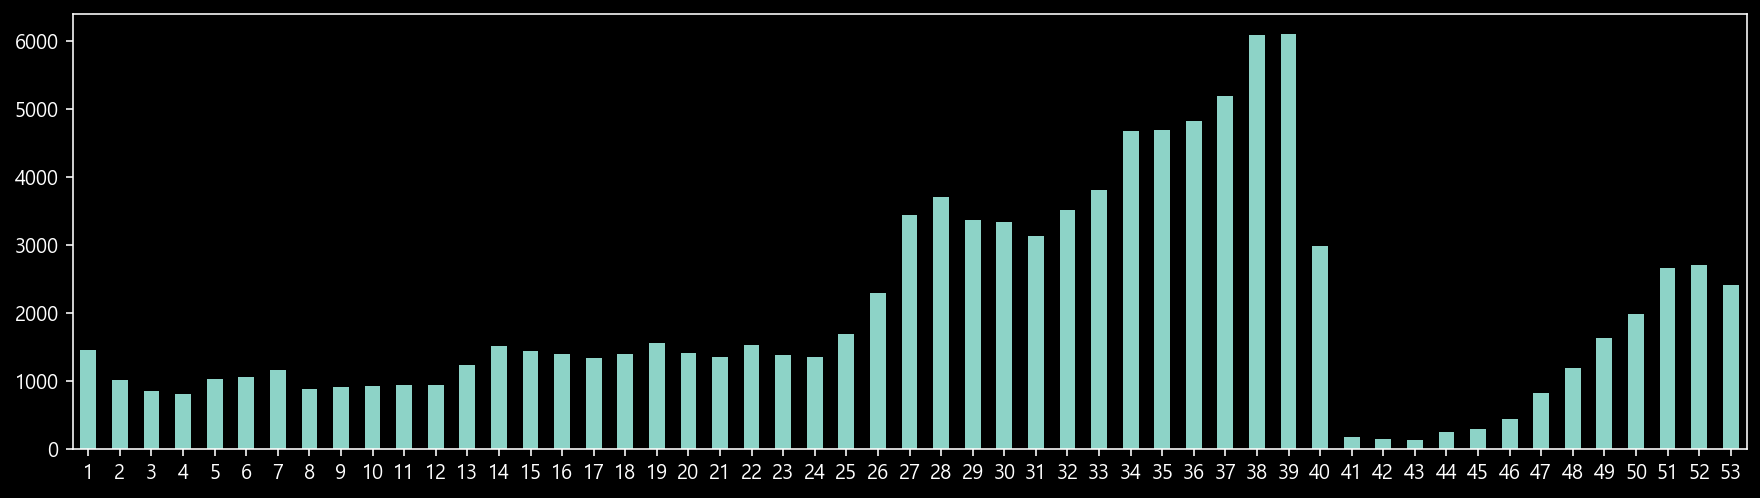

In [28]:
# 주단위 빈도수 막대그래프로 그리기
weekly_case.plot.bar(figsize=(15, 4), rot=0)

### 년-월-주 함께 그리기

In [29]:
# groupby 를 통해 "월", "주" 로 그룹화 하여 빈도수를 계산합니다.
year_month_weekly_case = df.groupby(["년", "월", "주"])["연번"].count()
year_month_weekly_case

년     월   주 
2020  1   4        1
          5        6
      2   5        1
          6        4
          7        2
                ... 
2021  9   37    4839
          38    5798
          39    3755
      10  39    2101
          40    2822
Name: 연번, Length: 108, dtype: int64

<AxesSubplot:xlabel='년,월,주'>

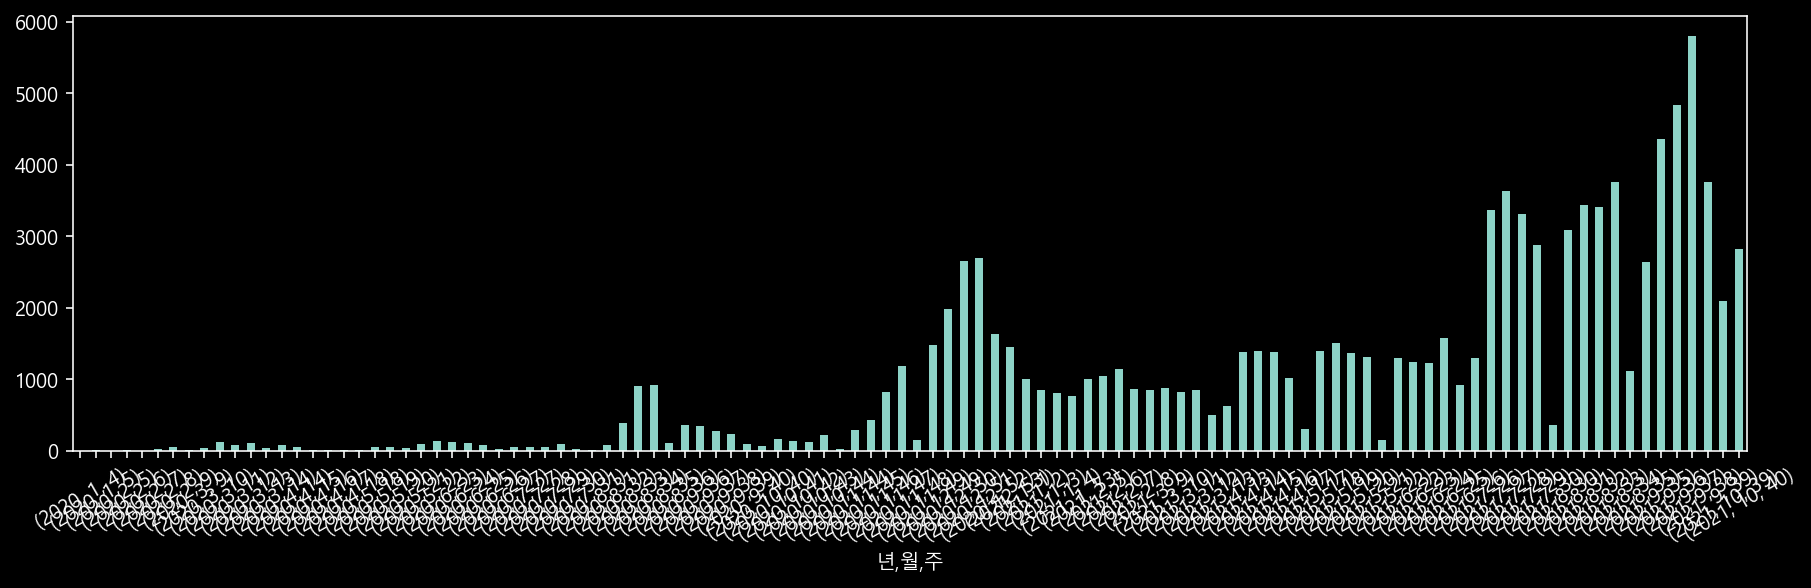

In [30]:
# 월-주 를 함께 그래프에 표현하기

year_month_weekly_case.plot.bar(figsize=(15, 4), rot=30)

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [31]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.
first_day = df.iloc[-1, 7]

In [32]:
last_day = df.iloc[0, 7]

In [33]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day, last_day)
days[:5]

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [34]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# days.to_frame()
df_days =  pd.DataFrame({"확진일자": days})
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [35]:
# 확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts()
daily_case.head()

2021-09-24    1222
2021-09-28    1054
2021-09-29     944
2021-09-25     928
2021-09-30     915
Name: 확진일자, dtype: int64

In [36]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기
df_daily_case = daily_case.to_frame()
df_daily_case.head()

,확진일자
2021-09-24,1222
2021-09-28,1054
2021-09-29,944
2021-09-25,928
2021-09-30,915


In [37]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기
df_daily_case.columns = ["확진수"]
df_daily_case.head()

,확진수
2021-09-24,1222
2021-09-28,1054
2021-09-29,944
2021-09-25,928
2021-09-30,915


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [38]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
# 1321
all_day = df_days.merge(df_daily_case, 
                        left_on="확진일자", 
                        right_on=df_daily_case.index, how="left")
all_day.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


## 누적 확진자 수 구하기

In [40]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.
# cumsum 누적합
all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
618,2021-10-03,574.0,103510.0
619,2021-10-04,521.0,104031.0
620,2021-10-05,689.0,104720.0
621,2021-10-06,836.0,105556.0


In [59]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기
# all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-5:])
# all_day.head()

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28


In [41]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
# cum_day = all_day[["확진일자", "확진수", "누적확진"]]
all_day = all_day.set_index("확진일자")
all_day.head()

,확진수,누적확진
확진일자,,
2020-01-24,1.0,1.0
2020-01-25,NaN,1.0
2020-01-26,NaN,1.0
2020-01-27,NaN,1.0
2020-01-28,NaN,1.0


### 데이터프레임으로 그리기

<AxesSubplot:xlabel='확진일자'>

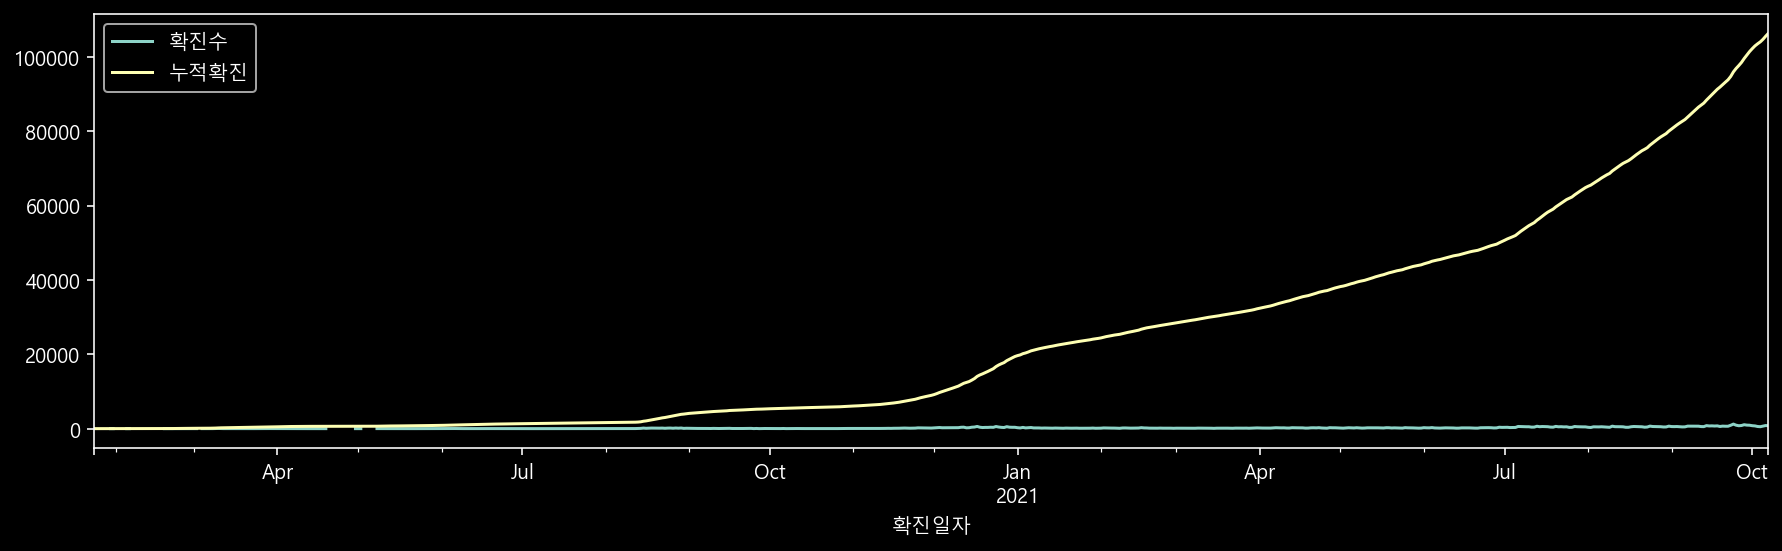

In [43]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.
all_day.plot(figsize=(15, 4))

### 시리즈로 그리기

<AxesSubplot:xlabel='확진일자'>

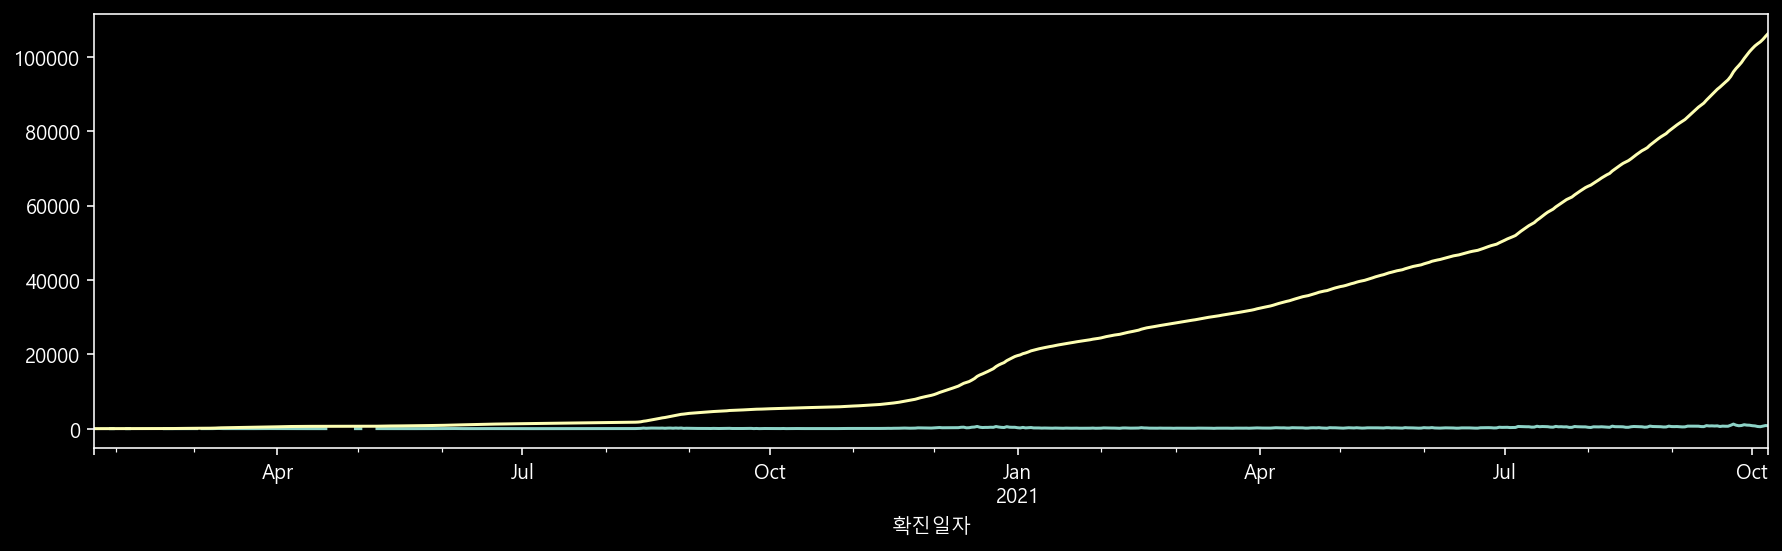

In [46]:
# 시리즈로 2개의 그래프 그리기
all_day["확진수"].plot()
all_day["누적확진"].plot(figsize=(15, 4))

### 확진수만 따로 그리기

<AxesSubplot:xlabel='확진일자'>

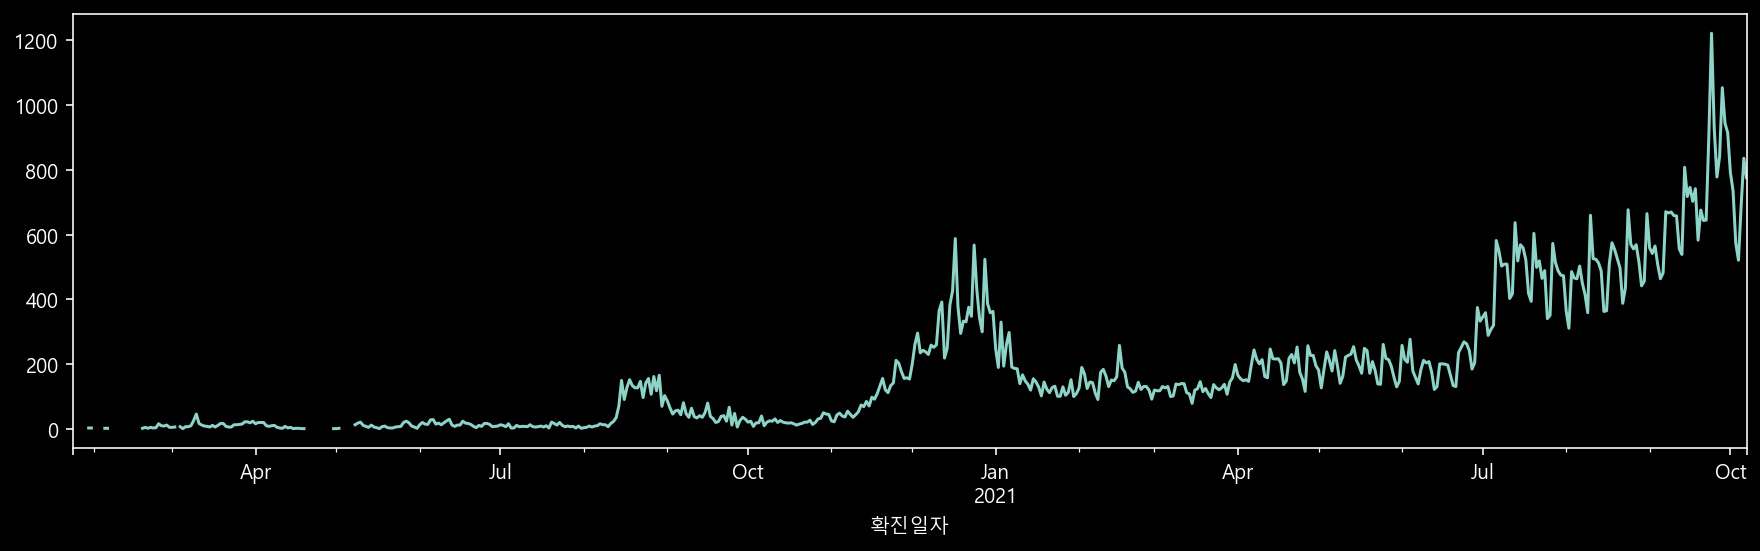

In [48]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
all_day["확진수"].plot(figsize=(15, 4))

### 누적확진만 따로 그리기

<AxesSubplot:xlabel='확진일자'>

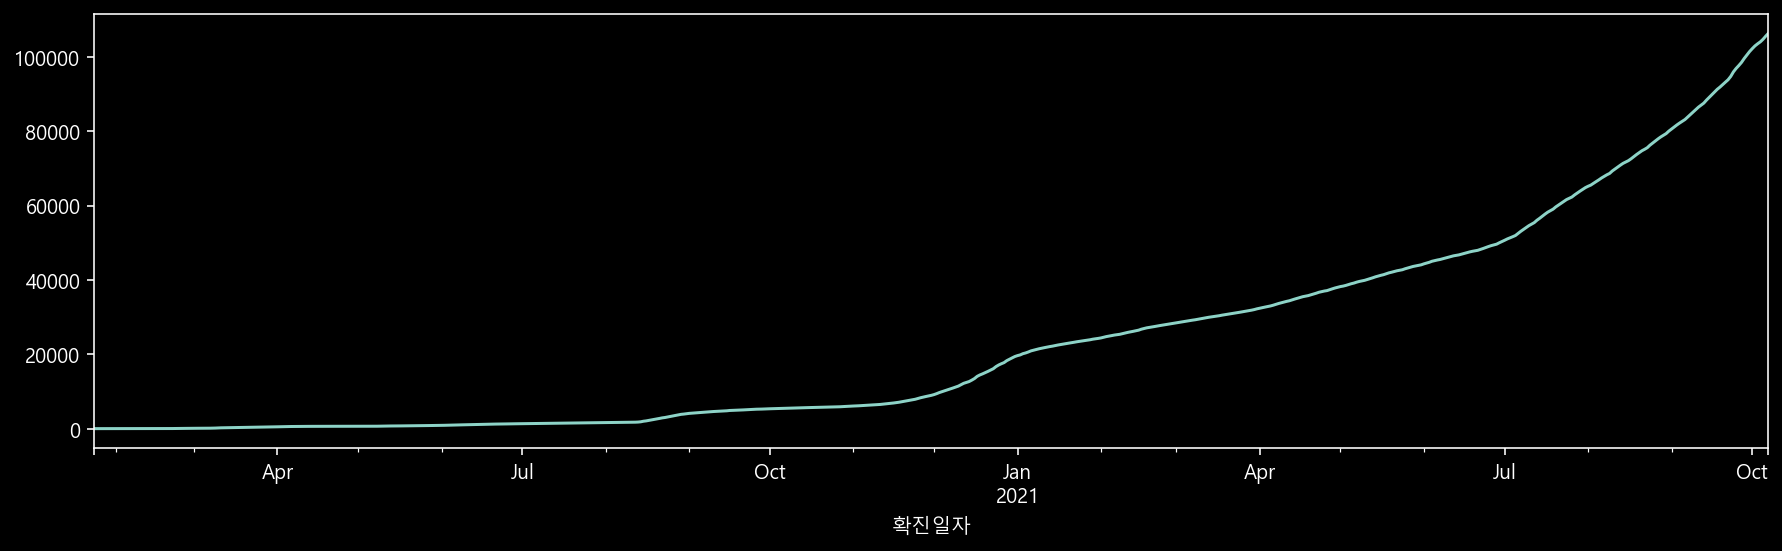

In [49]:
# 누적확진만 따로 그립니다.
all_day["누적확진"].plot(figsize=(15, 4))

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

<AxesSubplot:xlabel='확진일자'>

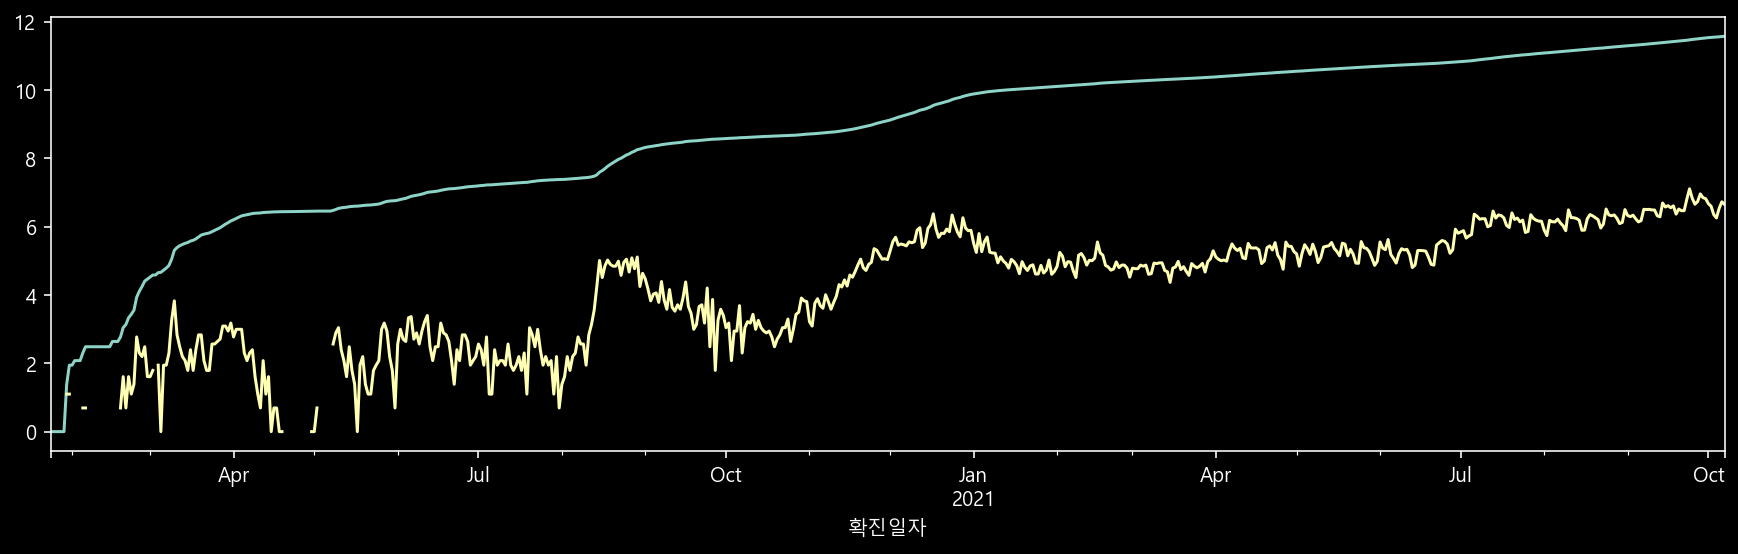

In [50]:
np.log(all_day["누적확진"]).plot(figsize=(15, 4))
np.log(all_day["확진수"]).plot()

## 확진월과 요일 구하기

In [62]:
# cum_day
all_day["확진연"] = all_day["확진일자"].dt.year
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,확진월,확진요일,확진연
0,2020-01-24,1.0,1.0,1,4,2020
1,2020-01-25,NaN,1.0,1,5,2020
2,2020-01-26,NaN,1.0,1,6,2020
3,2020-01-27,NaN,1.0,1,0,2020
4,2020-01-28,NaN,1.0,1,1,2020


### 요일별 확진 수 

In [64]:
# 월별, 요일별 확진수를 groupby로 구하기
all_day_week = all_day.groupby(["확진연", "확진월", "확진요일"])["확진수"].sum()
all_day_week = all_day_week.unstack().astype(int)
all_day_week

확진요일         0     1     2     3     4     5     6
확진연  확진월                                          
2020 1       0     0     0     3     4     0     0
     2       4    16    14    16    14    10     6
     3      68    89    48    44    48    45    49
     4      15    17    28    28    26    23    19
     5      26    37    33    34    32    36    31
     6      55    65    66    74    92    69    38
     7      38    42    42    57    34    40    28
     8     389   331   273   334   332   480   276
     9     182   261   235   216   138   160   114
     10     71   112    81   132   134   123    80
     11    444   321   423   449   439   417   411
     12   1334  1605  1647  2075  1408  1273  1090
2021 1     564   683   663   536   870   753   809
     2     495   767   664   594   537   538   465
     3     543   672   705   538   509   506   424
     4     569   920   918  1028  1021   742   605
     5     804   970   899   796   898   931   732
     6     606  1253  1213   879   945   762   600
     7    1482  2396  2082  2425  2367  2282  1470
     8    1927  2997  2137  2098  2110  1952  1972
     9    2539  3177  3533  3778  3149  2836  2381
     10    521   689   836   776   792   735   574

In [65]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [66]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.
all_day_week.columns = dayofweek
all_day_week

월     화     수     목     금     토     일
확진연  확진월                                          
2020 1       0     0     0     3     4     0     0
     2       4    16    14    16    14    10     6
     3      68    89    48    44    48    45    49
     4      15    17    28    28    26    23    19
     5      26    37    33    34    32    36    31
     6      55    65    66    74    92    69    38
     7      38    42    42    57    34    40    28
     8     389   331   273   334   332   480   276
     9     182   261   235   216   138   160   114
     10     71   112    81   132   134   123    80
     11    444   321   423   449   439   417   411
     12   1334  1605  1647  2075  1408  1273  1090
2021 1     564   683   663   536   870   753   809
     2     495   767   664   594   537   538   465
     3     543   672   705   538   509   506   424
     4     569   920   918  1028  1021   742   605
     5     804   970   899   796   898   931   732
     6     606  1253  1213   879   945   762   600
     7    1482  2396  2082  2425  2367  2282  1470
     8    1927  2997  2137  2098  2110  1952  1972
     9    2539  3177  3533  3778  3149  2836  2381
     10    521   689   836   776   792   735   574

In [67]:
# style.background_gradient 로 색상을 표현합니다.
all_day_week.style.background_gradient(cmap="Blues")

## 거주지별 확진자

In [68]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.
gu_count = df["거주지"].value_counts()
gu_count.head()

강남구     7235
송파구     6739
관악구     5658
타시도     5028
영등포구    4769
Name: 거주지, dtype: int64

<AxesSubplot:>

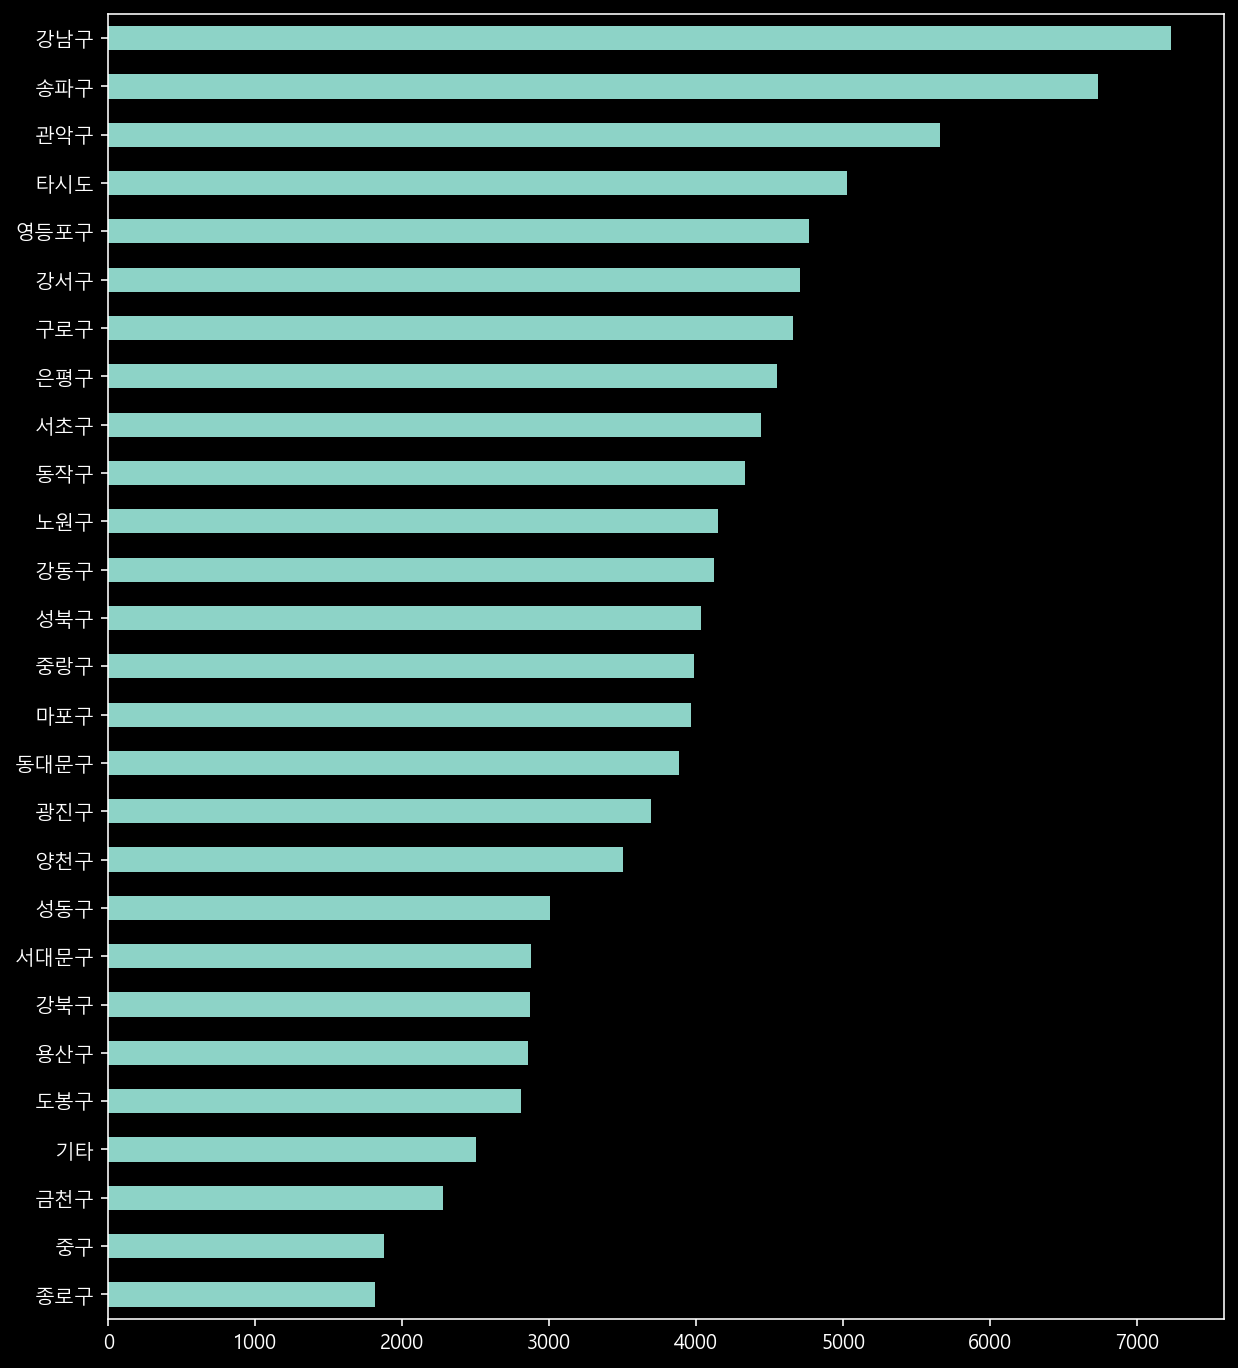

In [69]:
# 구별 확진자의 수를 시각화 합니다.
gu_count.sort_values().plot.barh(figsize=(10, 12))

## 접촉력

In [86]:
# 접촉력 빈도수를 구합니다.
df["접촉력"].value_counts().head(20)

기타 확진자 접촉                40728
감염경로 조사중                 35137
타시도 확진자 접촉                4282
해외유입                      1774
동부구치소 관련                  1175
병원 및 요양시설                 1067
송파구 소재 시장 관련('21.9.)       724
성북구 사랑제일교회 관련              641
중구 소재 시장 관련('21.9.)        295
강서구 교회 관련                  246
종로구 소재 파고다타운 관련            227
구로구 소재 요양병원/요양원 관련         226
강서구 댄스교습관련 시설              224
용산구 소재 병원 관련               219
관악구 소재 사우나 관련('21.7.)      192
이태원 클럽 관련                  139
강남구 소재 직장 관련('21.7.)       138
송파구 소재 시장 관련('21.5.)       126
8.15서울도심집회                 126
마포구 홍대새교회 관련               109
Name: 접촉력, dtype: int64

In [90]:
# 접촉력의 unique 값만 구합니다.
df["접촉력"].unique()

array(['마포구 소재 시장 관련', '감염경로 조사중', '기타 확진자 접촉', ..., '은평성모병원', '명성교회',
       '종로구 집단발병'], dtype=object)

<AxesSubplot:>

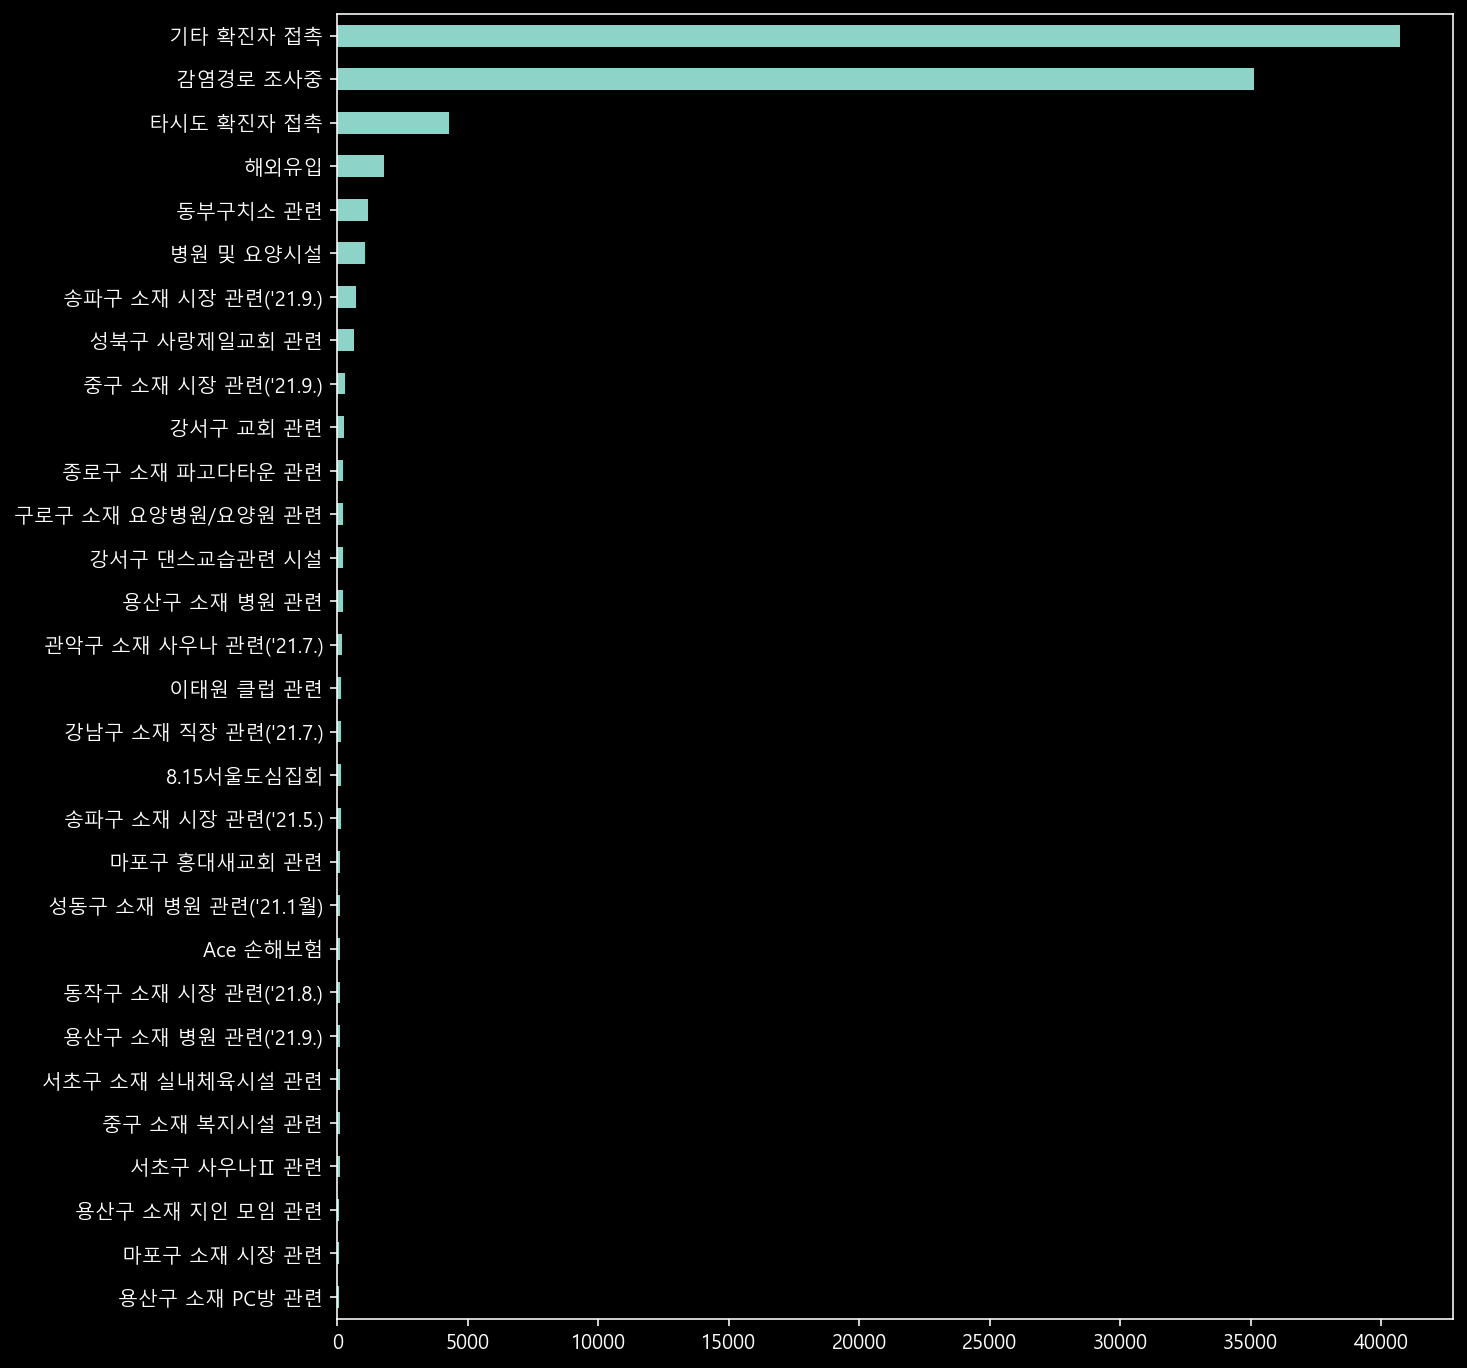

In [91]:
# 접촉력 빈도수를 시각화 합니다.
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(30)
contact_count_top.plot.barh(figsize=(10, 12))

In [92]:
# 상위 15개만 구합니다.
top_contact = contact_count_top.tail(15)
top_contact

관악구 소재 사우나 관련('21.7.)      192
용산구 소재 병원 관련               219
강서구 댄스교습관련 시설              224
구로구 소재 요양병원/요양원 관련         226
종로구 소재 파고다타운 관련            227
강서구 교회 관련                  246
중구 소재 시장 관련('21.9.)        295
성북구 사랑제일교회 관련              641
송파구 소재 시장 관련('21.9.)       724
병원 및 요양시설                 1067
동부구치소 관련                  1175
해외유입                      1774
타시도 확진자 접촉                4282
감염경로 조사중                 35137
기타 확진자 접촉                40728
Name: 접촉력, dtype: int64

In [93]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.
top_contact.index

Index(['관악구 소재 사우나 관련('21.7.)', '용산구 소재 병원 관련', '강서구 댄스교습관련 시설',
       '구로구 소재 요양병원/요양원 관련', '종로구 소재 파고다타운 관련', '강서구 교회 관련',
       '중구 소재 시장 관련('21.9.)', '성북구 사랑제일교회 관련', '송파구 소재 시장 관련('21.9.)',
       '병원 및 요양시설', '동부구치소 관련', '해외유입', '타시도 확진자 접촉', '감염경로 조사중', '기타 확진자 접촉'],
      dtype='object')

In [ ]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.
top_group = df[df["접촉력"].isin(top_contact.index)]
top_group.head()

In [ ]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
top_group.groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)

### 이태원 클럽 관련
* 이태원 클럽 전파는 5월에 시작되었으나 6월에도 확진자가 있습니다.
* 6월에 이태원 클럽관련 확진자를 찾아봅니다.

In [ ]:
df[df["접촉력"].str.contains("이태원") & (df["월"] == 6)]

### 감염경로 불명

In [ ]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.

df_unknown = df[df["접촉력"] == "감염경로 조사중"]
df_unknown.head()

In [ ]:
# 감염경로 불명이 어느정도인지 봅니다.
unknown_weekly_case = df_unknown.groupby(["월", "주"])["연번"].count()
unknown_weekly_case.plot.bar(figsize=(15, 4))

In [ ]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

In [ ]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
unknown_weekly_case = df_unknown["주"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

In [ ]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.

unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index=True, right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case.head()

In [ ]:
# 위에서 구한 결과를 시각화 합니다.

unknown_case.plot(figsize=(15, 4))

In [ ]:
# 감염경로 "확인 중"의 주별 비율

unknown_case["확인중비율"] = (unknown_case["불명확진수"] / unknown_case["전체확진수"]) * 100
unknown_case["확인중비율"].plot.bar(figsize=(15, 4))

## 가장 많은 전파가 일어난 번호
* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


In [ ]:
import re
# 정규표현식 라이브러리를 불러옵니다.
# 숫자외의 데이터는 제거하는 정규표현식
# #7265 접촉(추정)


In [ ]:
# 함수를 통해 숫자외의 문자를 제거하는 get_number 함수를 만듭니다.

def get_number(text):
    return re.sub("[^0-9]", "", text)

get_number("#7265 접촉(추정)")

In [ ]:
# 함수를 map을 통해 접촉번호를 구합니다.

df["접촉번호"] = df["접촉력"].map(get_number)
contact = df["접촉번호"].value_counts().reset_index()
contact.head()

In [ ]:
# 접촉번호가 없는 0번 행은 drop 으로 삭제합니다.
# 한번 drop 한 셀을 다시 drop 하면 이미 삭제를 했는데 다시 삭제하려 하기 때문에 KeyError 가 납니다. 
# 다시 실행했을 때 KeyError 가 발생하는 것이 정상입니다.

df_contact = contact.drop(0)
df_contact = df_contact.head(10)
df_contact

In [ ]:
# 상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니다.

top_contact_no = df_contact["index"]

In [ ]:
# contact의 환자번호와 df의 접촉번호를 merge 합니다.

df[df["접촉번호"].isin(top_contact_no)]

## 조치사항

In [ ]:
# 조치사항에 대한 빈도수를 세어봅니다.
# value_counts 는 Series 에만 사용할 수 있습니다.
# 단일 변수의 빈도수를 세는데 사용합니다.

df["퇴원현황"].value_counts()

## 퇴원, 사망여부

In [ ]:
# 퇴원현황 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만들어서 담습니다.

df["퇴원"] = df["퇴원현황"].str.contains("퇴원")
df["사망"] = df["퇴원현황"].str.contains("사망")
# 윈도우의 역슬래시는 엔터키 위에 원달러 표시로 있습니다.
df["병원"] = df["퇴원현황"].str.replace("\(퇴원\)", "")
df["병원"] = df["병원"].str.replace("\(사망\)", "")

In [ ]:
# 데이터 수집 시점에서 퇴원하지 못한 환자수

df["퇴원"].value_counts()

In [ ]:
# 퇴원여부 빈도수에 대한 비율을 구합니다.

df["퇴원"].value_counts(normalize=True)

In [ ]:
# 사망여부에 따른 빈도수를 구합니다.

df["사망"].value_counts()

In [ ]:
# 사망 여부에 따른 빈도수의 비율을 구합니다.
df["사망"].value_counts(normalize=True) * 100

## 여행력

In [ ]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"].nunique()

In [ ]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수
df["해외"].describe()

In [ ]:
df["해외"].value_counts().head(10)

### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [ ]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

In [ ]:
# 중복되는 지역명이 있는지 확인합니다.
df_oversea["해외"].unique()

### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [ ]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(europe)].head()

In [ ]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

In [ ]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea["해외"].value_counts()

In [ ]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수
df_oversea["해외"].describe()

In [ ]:
# 확진일자, 해외 별 카운트 수를 구합니다.

day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count()
day_oversea.head()

In [ ]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.

day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

In [ ]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.

df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={"연번":"누적확진수"})
df_day_oversea.head()

In [ ]:
# "해외" 컬럼의 빈도수를 구합니다.
oversea_count = df_oversea["해외"].value_counts()

In [ ]:
# 위에서 구한 빈도수를 시각화 합니다.
oversea_count.sort_values().plot.barh(figsize=(10, 12))

In [ ]:
df_day_oversea = df_day_oversea.set_index("확진일자")

In [ ]:
df_day_oversea.pivot(columns="해외").plot(figsize=(24, 4), legend=False)

In [ ]:
df_day_oversea.loc[df_day_oversea["해외"] == "미국", "누적확진수"].plot()

In [ ]:
oversea_count_gu = df_oversea["지역"].value_counts()
oversea_count_gu.head()

In [ ]:
# "해외유입 구별 확진자" 시각화 하기

oversea_count_gu.sort_values().plot.barh(figsize=(10, 12))

### 전체확진수와 해외유입 확진수 비교

In [ ]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기
all_count_gu = df["지역"].value_counts()

In [ ]:
# 데이터프레임으로 변환하고 컬럼명 변경하기

df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu

In [ ]:
# 해외유입확진수 구하기

df_oversea_gu = pd.DataFrame({"해외유입확진수" : oversea_count_gu})

### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [ ]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기

df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case.head()

In [ ]:
# 시각화 하기

df_all_oversea_case.sort_values(by="해외유입확진수").plot.barh(figsize=(15, 8))

In [ ]:
# df_all_oversea_case["해외유입비율"] 구하기

df_all_oversea_case["해외유입비율"] = (df_all_oversea_case["해외유입확진수"] / df_all_oversea_case["전체확진수"]) * 100
df_all_oversea_case.sort_values(by="해외유입비율", ascending=False).head(10)

### 해외유입 확진자 중 퇴원 여부

In [ ]:
# oversea_finish_count 해외유입 확진자 중 퇴원 여부 구하기
oversea_finish_count = df_oversea.groupby(["지역", "퇴원"])["연번"].count().unstack()
oversea_finish_count = oversea_finish_count.fillna(0).astype(int)
oversea_finish_count.plot.bar(figsize=(15, 4), rot=30)

### 월별 해외 확진자 수

In [ ]:
oversea_monthly_case = df_oversea["월"].value_counts()
oversea_monthly_case.sort_index().plot()

In [ ]:
oversea_monthly_case.sort_index().plot.bar(rot=0)

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### groupby 로 빈도수 구하기

In [ ]:
month_gu = df_oversea.groupby(["월", "지역"])["연번"].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient(cmap="Greens")

#### crosstab 으로 빈도수 구하기

In [ ]:
month_gu = pd.crosstab(df_oversea["월"], df_oversea["지역"])
month_gu.style.bar()

#### pivot_table 로 빈도수 구하기

In [ ]:
pd.options.display.max_columns = 30

In [ ]:
month_gu = pd.pivot_table(df_oversea, index="월", columns="지역", values="연번", 
               aggfunc="count", fill_value=0)
month_gu

### 해외유입이 많은 지역(구)

In [ ]:
# 해외유입이 많은 상위 10개 지역을 구합니다.
top_oversea_gu = df_oversea["지역"].value_counts().head().index

In [ ]:
# 시각화 하기
g = month_gu[top_oversea_gu].plot(figsize=(15, 4))
g.legend(loc=1)

* 범례 위치 조정하기 : [matplotlib.pyplot.legend — Matplotlib 3.1.2 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

### 구별 해외유입 국가 분석하기
#### groupby 로 구하기

In [ ]:
group_oversea_gu = df_oversea.groupby(["해외", "지역"])["연번"].count().unstack()
group_oversea_gu.fillna(0).astype(int)

#### pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

In [ ]:
group_oversea_gu = df_oversea.pivot_table(index="해외", columns="지역", values="연번", 
                       aggfunc="count")
group_oversea_gu.style.background_gradient()

#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [ ]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?

group_oversea_gu.loc[["미국", "유럽", "남미", "중국"], ["강남구", "서초구", "송파구"]]

In [ ]:
# top_oversea_gu 에 따른 확진수 보기
group_oversea_gu[top_oversea_gu].dropna(how="all").fillna(0).astype(int)